# Introducción

En esta práctica vamos a examinar un conjunto de datos que contiene información biométrica y de salud, con el fin de determinar la presencia o ausencia del hábito de fumar en los individuos a partir de señales bio-saludables. El archivo smoking.csv que utilizaremos incluye características diferentes, tales como edad, peso, altura, niveles de glucosa en ayuno y colesterol, entre otros.

Este análisis nos permitirá aplicar y profundizar en técnicas de Machine Learning como SVM y kNN, así como en métodos de ingeniería de características, esenciales para la preparación y optimización de los datos para la modelización. Abordaremos la transformación de variables numéricas y categóricas, y exploraremos cómo estos procesos afectan el rendimiento de los modelos predictivos.

Comenzaremos con una exploración de los datos para entender su estructura y las relaciones entre las diferentes variables. Posteriormente, prepararemos los datos para su análisis, aplicando técnicas de preprocesamiento y generando nuevas características que nos ayudarán a capturar la complejidad del conjunto de datos y a mejorar la precisión de nuestros modelos predictivos.

## El Dataset

El conjunto de datos con el que trabajaremos incluye una serie de atributos relacionados con la salud y mediciones biométricas. Aquí está la descripción de cada atributo y su posible asociación con el hábito de fumar:

* **ID**: Identificador único para cada individuo en el dataset. No tiene asociación directa con el hábito de fumar.
* **Gender**: Género del individuo, que puede tener variaciones en la prevalencia del hábito de fumar.
* **Age**: Edad del individuo, presentada en intervalos de 5 años. La prevalencia del hábito de fumar a menudo disminuye con la edad.
* **Height**: Altura en centímetros. No tiene una asociación directa con el hábito de fumar.
* **Weight**: Peso en kilogramos. El fumar puede influir en el peso y varía individualmente.
* **Waist**: Circunferencia de la cintura en centímetros. El fumar puede afectar la distribución de la grasa corporal.
* **Eyesight** (Left/Right): Medición de la agudeza visual para el ojo izquierdo/derecho. No tiene asociación directa con el hábito de fumar.
* **Hearing** (Left/Right): Medición de la audición para el oído izquierdo/derecho. No tiene asociación directa con el hábito de fumar.
* **Systolic BP**: Presión arterial sistólica. El fumar puede afectar la presión arterial.
* **Diastolic BP**: Presión arterial diastólica. El fumar puede afectar la presión arterial.
* **Fasting Blood Sugar**: Nivel de azúcar en sangre en ayuno. El fumar puede impactar los niveles de azúcar en sangre.
* **Cholesterol (Total)**: Nivel total de colesterol. El fumar puede influir en los niveles de colesterol.
* **Triglyceride**: Nivel de triglicéridos. El fumar puede influir en los niveles de triglicéridos.
* **HDL Cholesterol**: Nivel de colesterol HDL. El fumar puede disminuir los niveles de colesterol HDL.
* **LDL Cholesterol**: Nivel de colesterol LDL. El fumar puede influir en los niveles de colesterol LDL.
* **Hemoglobin**: Nivel de hemoglobina. No tiene asociación directa con el hábito de fumar.
* **Urine Protein**: Presencia de proteína en la orina. El fumar puede impactar la función renal.
* **Serum Creatinine**: Nivel de creatinina en suero. El fumar puede impactar la función renal.
* **AST/ALT**: Niveles de transaminasas glutámico oxaloacéticas. El fumar puede impactar la función hepática.
* **GTP**: Nivel de γ-GTP. El fumar puede impactar el nivel de enzimas hepáticas.
* **Oral Exam Status**: Estado del examen oral. El fumar puede impactar la salud oral.
* **Dental Caries**: Presencia de caries dentales. El fumar puede afectar la salud dental.
* **Tartar Status**: Estado del tártaro. El fumar puede afectar la salud dental.
* **Blood Group**: Grupo sanguíneo del individuo.
* **Smoking Status**: Indica si el individuo es fumador o no. Esta es la variable objetivo que indica directamente el hábito de fumar.

Es importante comprender estas asociaciones, ya que nos ayudarán a determinar qué características pueden ser más relevantes para nuestros modelos predictivos y cómo podríamos necesitar transformarlas para mejorar la precisión de nuestras predicciones.







# 0. Importación de librerías

In [2]:
!pip install ucimlrepo
!pip install faker
!pip install findspark
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from scipy.stats import boxcox
from ucimlrepo import fetch_ucirepo
from faker import Faker
import findspark
import pyspark.sql.functions as f
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.4 MB/s eta 0:00:00


# Exploración Inicial de Datos

**Ejercicio 1** - Declara el tamaño del dataset. Con respecto a las columnas, identifica qué variables son numéricas y cuáles son categóricas. ¿Cuál es el individuo menos pesado? ¿Y el más alto? Dibuja un histograma de hombres y mujeres atendiendo a si fuman o no.

In [3]:
#Declara el tamaño del dataset.
df = pd.read_csv('/content/habitos_fumadores.csv')
print("Tamaño del dataset:", df.shape)


Tamaño del dataset: (55692, 28)


In [4]:
# identifica qué variables son numéricas y cuáles son categóricas.
numericas = df.select_dtypes(include=['number']).columns.tolist() #selecciono las columnas con tipo numerico y despues las añado a una lista
categoricas = df.select_dtypes(exclude=['number']).columns.tolist() ##selecciono las columnas con tipo NO numerico y despues las añado a una lista

print("Variables numéricas:", numericas)
print("Variables categóricas:", categoricas)


Variables numéricas: ['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']
Variables categóricas: ['gender', 'oral', 'tartar', 'blood_group']


In [5]:

#tras investigar un poco las distintas columnas me doy cuenta que la columna 'oral' todas sus filas contienen 'Y', sin excepcion y no hay ni nulos ni otro valor, lo compruebo así:
print("¿Todos son Y?", (df['oral'] == 'Y').all())

¿Todos son Y? True


In [6]:
#¿Cuál es el individuo menos pesado? ¿Y el más alto?
print("Individuo menos pesado:")
print(df.loc[df['weight(kg)'].idxmin(), ['ID', 'weight(kg)']]) #determino el indice donde el peso es minimo y saco las columnas de id y peso
print("\n")
print("Individuo más alto:")
print(df.loc[df['height(cm)'].idxmax(), ['ID', 'height(cm)']])

Individuo menos pesado:
ID            8763
weight(kg)      30
Name: 6964, dtype: object


Individuo más alto:
ID             68
height(cm)    190
Name: 57, dtype: object


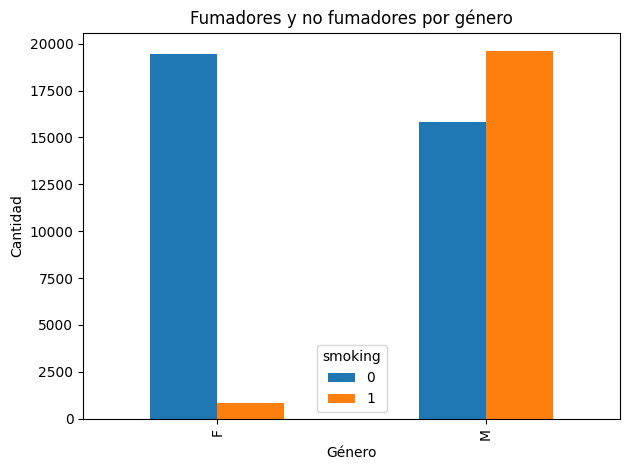

In [7]:
# Dibuja un histograma de hombres y mujeres atendiendo a si fuman o no.
df.groupby(['gender', 'smoking']).size().unstack().plot(kind='bar')

plt.title('Fumadores y no fumadores por género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

#observamos que no hay apenas personas de género femenino que fumen y una gran diferencia, en cambio, en personas de genero masculino, hay umás personas que fuman pero la estadística está mas igualada

**Ejercicio 2** - Sobre la variable continua "age" aplica una binarización por umbralización, tomando como umbral la media de las edades, incluyendo esta variable en el Dataframe como "age_bin". Haz un conteo de las dos categorías resultantes en la variable binarizada. Sobre la variable continua "Cholesterol" aplica una agrupación por cuantiles usando percentiles. Incluye esta variable en el dataframe como "Cholesterol_per".

Primera parte del ejercicio:

Sobre la variable continua "age" aplica una binarización por umbralización, tomando como umbral la media de las edades, incluyendo esta variable en el Dataframe como "age_bin".
Haz un conteo de las dos categorías resultantes en la variable binarizada.

In [8]:
#Paso 1. Calculo la media de la edad
umbral = df['age'].mean()
print(umbral)

44.18291675644617


In [9]:
# Paso 2: Binarizo age usando el umbral
df['age_bin'] = (df['age'] >= umbral).astype(int)
#Si es mayor o igual, el resultado es True se convierte en 1.
#Si es menor, el resultado es False se convierte en 0.

In [10]:
#Paso 3: conteo y compruebo que aparece la nueva columna
print(df['age_bin'].value_counts())
print(df.columns.tolist())

age_bin
0    28847
1    26845
Name: count, dtype: int64
['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries', 'tartar', 'smoking', 'blood_group', 'age_bin']


Segunda parte del ejercicio:

Sobre la variable continua "Cholesterol" aplica una agrupación por cuantiles usando percentiles. Incluye esta variable en el dataframe como "Cholesterol_per".


In [11]:
df['Cholesterol_per'] = pd.qcut(df['Cholesterol'], q=4, labels=False) # asigno cada dato en los grupos (0,1,2,3) segun su cuartil
print(df[['Cholesterol', 'Cholesterol_per']].head(10))

   Cholesterol  Cholesterol_per
0        215.0                2
1        192.0                1
2        242.0                3
3        322.0                3
4        184.0                1
5        217.0                2
6        226.0                3
7        222.0                3
8        210.0                2
9        198.0                2


* **Ejercicio 3** - Sobre la variable continua "fasting blood sugar" aplica un escalado máximo-mínimo. Dibuja un histograma de la variable original y otro histograma de la variable tras el escalado: ¿qué conclusiones sacas viendo ambos histogramas?

In [12]:
#Paso 1: Aplicar escalado máximo-mínimo
scaler = MinMaxScaler()
df['fbs_scaled'] = scaler.fit_transform(df[['fasting blood sugar']]) #los valores escalados pasan a estar en la columna 'fbs_scaled'

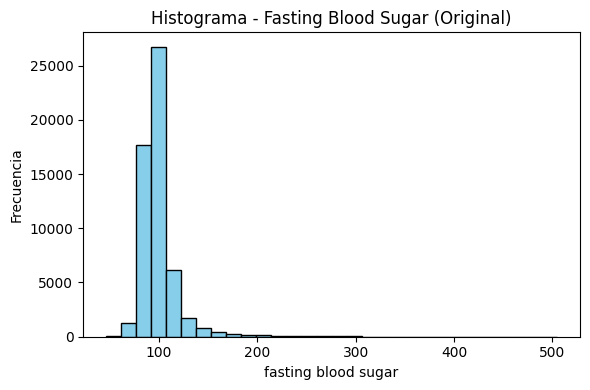

In [13]:
#paso 2: histograma con variable original
plt.figure(figsize=(6, 4))
plt.hist(df['fasting blood sugar'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma - Fasting Blood Sugar (Original)')
plt.xlabel('fasting blood sugar')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


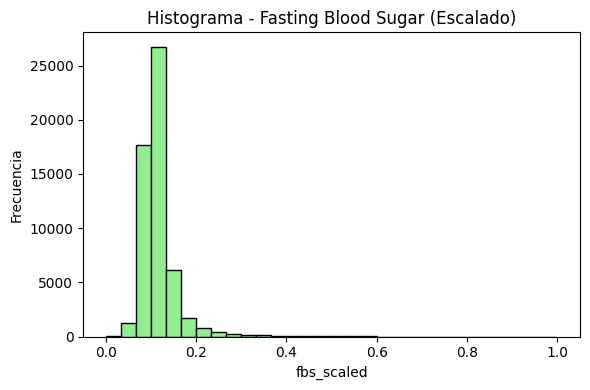

In [14]:
#paso 3: histograma con variable escalada
plt.figure(figsize=(6, 4))
plt.hist(df['fbs_scaled'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histograma - Fasting Blood Sugar (Escalado)')
plt.xlabel('fbs_scaled')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


Conclusión.

Aunque ajustamos los valores al rango [0,1], se preserva la distribución de los datos y no cambia visualmente, ya que también se mantienen las proporciones de la variable original. Por tanto, no obtenemos gran información salvo que el hecho de que la mayorá de los valores están en un intervalo entre 0 y 0.3. Teniendo en cuenta que el rango es entre 0 y 1 nos damos cuenta de que esto representa que hay outliers y que eso hace que estén los datos unicamente en una sección. pero sí nos puede servir para trabajar con estos datos en un futuro al estar ya escalados.

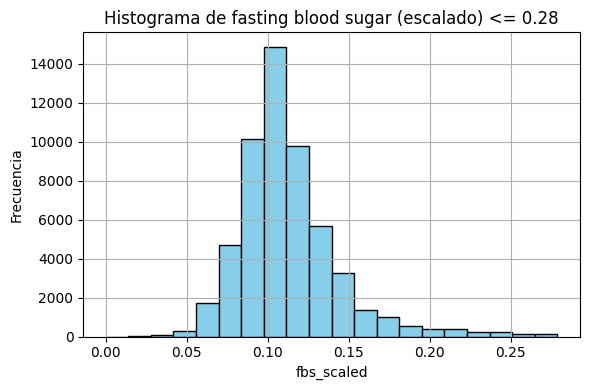

Filas originales: 55692
Filas después del filtrado: 54962
Filas eliminadas: 730
Porcentaje eliminado: 1.31%


In [15]:
#A continucación voy a tratar de eliminar estos outliers y vez como afectaría a la distribución de la visualización.
# Tamaño original
original_size = df.shape[0]

# Eliminar outliers mayores a 0.4 en fbs_scaled
df_filtered = df[df['fbs_scaled'] <= 0.28].copy()
filtered_size = df_filtered.shape[0]

# Mostrar histograma de los valores escalados filtrados
plt.figure(figsize=(6, 4))
plt.hist(df_filtered['fbs_scaled'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de fasting blood sugar (escalado) <= 0.28')
plt.xlabel('fbs_scaled')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Filas originales:", original_size)
print("Filas después del filtrado:", filtered_size)
print("Filas eliminadas:", original_size - filtered_size)
print("Porcentaje eliminado: {:.2f}%".format((original_size - filtered_size) / original_size * 100))

**Ejercicio 4** - Aisla la variable discreta "blood_group" en un dataframe que se componga de esa única variable. Genera 3 dataframes diferentes:

*   Uno con variables generadas mediante el método one-hot encoding
*   Otro con variables generadas mediante el método dummy coding
*   Un último con variables generadas mediante el método effect coding



In [16]:
#Paso 1: Aplico One-Hot Encoding sobre 'blood_group':
df_oh = pd.get_dummies(df[['blood_group']], prefix='blood')
print(df_oh.head())

   blood_0+  blood_A+  blood_A-  blood_B+
0     False      True     False     False
1     False     False      True     False
2      True     False     False     False
3     False      True     False     False
4     False     False      True     False


In [17]:
for col in df_oh.columns:
    print(f"Distribución en {col}:")
    print(df_oh[col].value_counts())
    print('')

Distribución en blood_0+:
blood_0+
False    41648
True     14044
Name: count, dtype: int64

Distribución en blood_A+:
blood_A+
False    41755
True     13937
Name: count, dtype: int64

Distribución en blood_A-:
blood_A-
False    41838
True     13854
Name: count, dtype: int64

Distribución en blood_B+:
blood_B+
False    41835
True     13857
Name: count, dtype: int64



In [18]:
#paso 2:  Aplico Dummy Coding sobre 'blood_group'
#print(df['blood_group'].value_counts())
#he decidido eliminar la columna de blood_0+ porque es la mas frecuente

df_dc = df_oh.drop('blood_0+', axis=1)
print(df_dc.head())

   blood_A+  blood_A-  blood_B+
0      True     False     False
1     False      True     False
2     False     False     False
3      True     False     False
4     False      True     False


In [19]:
for col in df_dc.columns:
    print(f"Distribución en {col}:")
    print(df_dc[col].value_counts())
    print('')

Distribución en blood_A+:
blood_A+
False    41755
True     13937
Name: count, dtype: int64

Distribución en blood_A-:
blood_A-
False    41838
True     13854
Name: count, dtype: int64

Distribución en blood_B+:
blood_B+
False    41835
True     13857
Name: count, dtype: int64



In [20]:
#paso 3: effect coding
df_ec = df_dc.copy()

# Identifico las filas donde todas las columnas son 0 que corresponden a '0+' y las reemplazo por -1
all_zeros = (df_ec == 0).all(axis=1)
df_ec.loc[all_zeros, :] = -1
print(df_ec.head())

  blood_A+ blood_A- blood_B+
0     True    False    False
1    False     True    False
2       -1       -1       -1
3     True    False    False
4    False     True    False


<ipython-input-20-638984037>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_ec.loc[all_zeros, :] = -1
<ipython-input-20-638984037>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_ec.loc[all_zeros, :] = -1
<ipython-input-20-638984037>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_ec.loc[all_zeros, :] = -1


In [21]:
for col in df_ec.columns:
    print(f"Distribución en {col}:")
    print(df_ec[col].value_counts())
    print('')

Distribución en blood_A+:
blood_A+
False    27711
-1       14044
True     13937
Name: count, dtype: int64

Distribución en blood_A-:
blood_A-
False    27794
-1       14044
True     13854
Name: count, dtype: int64

Distribución en blood_B+:
blood_B+
False    27791
-1       14044
True     13857
Name: count, dtype: int64



# Preprocesamiento de Datos

**Ejercicio 5**: En esta sección, continuar con la preparación de nuestro conjunto de datos para el análisis. Basándose en las tareas realizadas anteriormente:

* **División del conjunto de datos**: Segmentar los datos utilizando la librería scikitlearn con la semilla reproducible "1234", utilizando un 80% de conjunto de entrenamiento y un 20% de conjunto de testeo. Indicar el tamaño de ambos conjuntos.

In [22]:
# Divido del conjunto de datos
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1234)

# Se muestran los tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", df_train.shape)
print("Tamaño del conjunto de testeo:", df_test.shape)

#Aunque aqui hago la división del conjunto de datos, más adelante lo hago de nuevo en los modelos, esta es para mostrar como se hace y responder al ejercicio

Tamaño del conjunto de entrenamiento: (44553, 31)
Tamaño del conjunto de testeo: (11139, 31)


# Análisis Exploratorio de Datos (EDA)

**Ejercicio 6**: Explorar profundamente los datos para obtener insights que guíen la construcción del modelo:

* **Distribución de variables**: Para la variable "age" aplicar una agrupación por cuantiles utilizando deciles. Para cada grupo calcular el WoE asociado de forma manual. Calcular el IV de la variable discretizada con respecto al target. ¿Crees que es una variable importante de cara a su relación con la variable objetivo (smoking)?

* **Relaciones entre variables**: Realiza el mismo ejercicio para la variable "Height". Segun los resultados obtenidos, ¿cuál crees que tiene un poder predictor más fuerte?

In [23]:
#Paso 1 Distribución de variables:

#Para la variable "age" aplicar una agrupación por cuantiles utilizando deciles:

# Asigno rank a la columna  edad
df['age_rank'] = df['age'].rank(method='first')

# Divido por deciles usando los rank ya que sino hay intervalos con los mismos limites
df['age_decile'] = pd.qcut(df['age_rank'], q=10)

#  registros por decil
print(df['age_decile'].value_counts().sort_index())

# INtervalos de edad de cada decil
print(df.groupby('age_decile')['age'].agg(['min', 'max']).rename(columns={'min': 'Edad mínima', 'max': 'Edad máxima'}))


age_decile
(0.999, 5570.1]       5570
(5570.1, 11139.2]     5569
(11139.2, 16708.3]    5569
(16708.3, 22277.4]    5569
(22277.4, 27846.5]    5569
(27846.5, 33415.6]    5569
(33415.6, 38984.7]    5569
(38984.7, 44553.8]    5569
(44553.8, 50122.9]    5569
(50122.9, 55692.0]    5570
Name: count, dtype: int64
                    Edad mínima  Edad máxima
age_decile                                  
(0.999, 5570.1]              20           30
(5570.1, 11139.2]            30           35
(11139.2, 16708.3]           35           40
(16708.3, 22277.4]           40           40
(22277.4, 27846.5]           40           40
(27846.5, 33415.6]           40           45
(33415.6, 38984.7]           45           50
(38984.7, 44553.8]           50           55
(44553.8, 50122.9]           55           60
(50122.9, 55692.0]           60           85


<ipython-input-23-1367212938>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('age_decile')['age'].agg(['min', 'max']).rename(columns={'min': 'Edad mínima', 'max': 'Edad máxima'}))


In [24]:
df_woes = df[['age_decile', 'smoking']].copy()

# Calcular totales de buenos (fuma) y malos (no fuma)
total_buenos = df_woes[df_woes['smoking'] == 1].shape[0]
total_malos = df_woes[df_woes['smoking'] == 0].shape[0]

woes = []
ivs = []

# Calcular WoE e IV para cada decil
for grupo in df_woes['age_decile'].unique():
    # Contar buenos y malos en cada grupo
    buenos = df_woes[(df_woes['age_decile'] == grupo) & (df_woes['smoking'] == 1)].shape[0]
    malos = df_woes[(df_woes['age_decile'] == grupo) & (df_woes['smoking'] == 0)].shape[0]

    # Calcular proporciones
    porc_buenos = buenos / total_buenos if total_buenos > 0 else 0
    porc_malos = malos / total_malos if total_malos > 0 else 0

    # Calcular WoE
    if porc_buenos > 0 and porc_malos > 0:
        woe = np.log(porc_buenos / porc_malos)
    else:
        woe = 0

    woes.append(woe)

    # Calcular IV
    iv = (porc_buenos - porc_malos) * woe
    ivs.append(iv)

for grupo, woe, iv in zip(df_woes['age_decile'].unique(), woes, ivs):
    print(f"Grupo: {grupo} - WoE: {woe:.4f} - IV: {iv:.4f}")

print(sum(ivs))

Grupo: (11139.2, 16708.3] - WoE: 0.3192 - IV: 0.0105
Grupo: (38984.7, 44553.8] - WoE: -0.2026 - IV: 0.0040
Grupo: (0.999, 5570.1] - WoE: 0.4548 - IV: 0.0216
Grupo: (27846.5, 33415.6] - WoE: -0.1294 - IV: 0.0016
Grupo: (33415.6, 38984.7] - WoE: -0.1262 - IV: 0.0016
Grupo: (5570.1, 11139.2] - WoE: 0.5184 - IV: 0.0282
Grupo: (44553.8, 50122.9] - WoE: -0.3655 - IV: 0.0126
Grupo: (50122.9, 55692.0] - WoE: -0.6544 - IV: 0.0382
Grupo: (16708.3, 22277.4] - WoE: 0.0120 - IV: 0.0000
Grupo: (22277.4, 27846.5] - WoE: 0.0143 - IV: 0.0000
0.11834317797453185


¿Crees que es una variable importante de cara a su relación con la variable objetivo (smoking)?

Dados los resultados y teniendo en cuenta la interpretación del IV según la teoría, donde un valor entre 0.02 < IV < 0.1 indica un poder predictivo débil, se observa que en nuestros resultados solo dos deciles entran en esa condición, y lo hacen por escaso margen. Esto implica que, aunque algunos deciles presentan un poder de predicción débil, la mayoría no tienen ningún poder predictivo. Por tanto, tras realizar el estudio anterior, considero que esta variable no tiene gran importancia en relación con la variable objetivo smoking.

In [25]:
#Paso 2: Relaciones entre variables: Realizo el mismo ejercicio para la variable "Height"


df['height_rank'] = df['height(cm)'].rank(method='first')


df['height_decile'] = pd.qcut(df['height_rank'], q=10)


print(df['height_decile'].value_counts().sort_index())


print(df.groupby('height_decile')['height(cm)'].agg(['min', 'max']).rename(columns={'min': 'Altura mínima', 'max': 'Altura máxima'}))


df_woes = df[['height_decile', 'smoking']].copy()


total_buenos = df_woes[df_woes['smoking'] == 1].shape[0]
total_malos = df_woes[df_woes['smoking'] == 0].shape[0]

woes = []
ivs = []

# Calcular WoE e IV por decil
for grupo in df_woes['height_decile'].unique():
    buenos = df_woes[(df_woes['height_decile'] == grupo) & (df_woes['smoking'] == 1)].shape[0]
    malos = df_woes[(df_woes['height_decile'] == grupo) & (df_woes['smoking'] == 0)].shape[0]

    porc_buenos = buenos / total_buenos if total_buenos > 0 else 0
    porc_malos = malos / total_malos if total_malos > 0 else 0

    if porc_buenos > 0 and porc_malos > 0:
        woe = np.log(porc_buenos / porc_malos)
    else:
        woe = 0

    woes.append(woe)
    iv = (porc_buenos - porc_malos) * woe
    ivs.append(iv)


for grupo, woe, iv in zip(df_woes['height_decile'].unique(), woes, ivs):
    print(f"Grupo: {grupo} - WoE: {woe:.4f} - IV: {iv:.4f}")

print(sum(ivs))

height_decile
(0.999, 5570.1]       5570
(5570.1, 11139.2]     5569
(11139.2, 16708.3]    5569
(16708.3, 22277.4]    5569
(22277.4, 27846.5]    5569
(27846.5, 33415.6]    5569
(33415.6, 38984.7]    5569
(38984.7, 44553.8]    5569
(44553.8, 50122.9]    5569
(50122.9, 55692.0]    5570
Name: count, dtype: int64
                    Altura mínima  Altura máxima
height_decile                                   
(0.999, 5570.1]               130            150
(5570.1, 11139.2]             150            155
(11139.2, 16708.3]            155            160
(16708.3, 22277.4]            160            160
(22277.4, 27846.5]            160            165
(27846.5, 33415.6]            165            170
(33415.6, 38984.7]            170            170
(38984.7, 44553.8]            170            175
(44553.8, 50122.9]            175            175
(50122.9, 55692.0]            175            190
Grupo: (5570.1, 11139.2] - WoE: -1.8013 - IV: 0.2169
Grupo: (11139.2, 16708.3] - WoE: -1.0174 - IV: 0.

<ipython-input-25-783462431>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('height_decile')['height(cm)'].agg(['min', 'max']).rename(columns={'min': 'Altura mínima', 'max': 'Altura máxima'}))


Segun los resultados obtenidos, ¿cuál crees que tiene un poder predictor más fuerte?

Observamos en este caso que los valores de IV asociados a la variable height son considerablemente mayores en comparación con la variable anterior. Destacan algunos deciles que incluso alcanzan un valor de IV de 0.3779, lo cual implica un poder predictivo fuerte. Además, dicho valor supera por más del triple a la suma total de los IV obtenidos con la variable age. Por lo tanto, teniendo en cuenta las sumas totales de los IV para cada variable:

age: IV total = 0.118... y height: IV total = 1.017...

Concluyo que la variable height presenta un poder predictor más fuerte en relación con la variable objetivo smoking.

# Selección de Características

**Ejercicio 7**: Evaluar y seleccionar las características más informativas para el modelo:

* **Determinación de características relevantes**: Utilizando el atributo ".corr()" del DataFrame en formato pandas enuncia las 3 variables que más se correlen con la variable objetivo. ¿Qué interpretación lógica puedes dar a la correlación obtenida con respecto a dichas variables?


In [26]:
##a continuacion vamos a escalar todas las caracteristicas numericas y a representar las matriz de correlacion con todas las carcateristicas,
#esto nos servirá además de para observar la correlación de las características una vez escaladas para el posterior uso en modelos
#a continuación vamos a aplicar unos cambiuos al df necesarios para realizar el escalado


# Copia del DataFrame original filtrado (sin outliers en fbs_scaled)
df_clean = df_filtered.copy()

#La columna oral solo contiene el valor 'Y' en todos los registros, por tanto no aporta información útil y se puede eliminar al igual que la columna ID. tambien la de age ya que tenemos age_bin
#tambien eliminamos la de fast blood sugar ya que la tenemos una columna escalada por un ejercicio anterior

df_clean = df_clean.drop(columns=['ID', 'oral', 'age', 'fasting blood sugar'])


# Calcular IMC y añadir nueva columna
df_clean['imc'] = df_clean['weight(kg)'] / (df_clean['height(cm)'] / 100) ** 2

# Eliminar columnas originales de peso y altura
df_clean = df_clean.drop(columns=['weight(kg)', 'height(cm)'])

# Codificar 'gender': M → 1, F → 0
df_clean['gender'] = df_clean['gender'].map({'M': 1, 'F': 0})

# Codificar 'tartar': Y → 1, N → 0
df_clean['tartar'] = df_clean['tartar'].map({'Y': 1, 'N': 0})

# One-hot encoding sobre blood_group
df_oh = pd.get_dummies(df_clean[['blood_group']], prefix='blood')
df_clean = pd.concat([df_clean.drop(columns=['blood_group']), df_oh], axis=1)

# Convertir booleanos a enteros por precaución
df_clean = df_clean.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Reordenar para que 'smoking' sea la última
cols = [col for col in df_clean.columns if col != 'smoking'] + ['smoking']
df_clean = df_clean[cols]

# Mostrar primeras filas
print(df_clean.head())

<ipython-input-26-11298741>:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(lambda x: int(x) if isinstance(x, bool) else x)


   gender  waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  \
0       0       81.3             1.2              1.0            1.0   
1       0       81.0             0.8              0.6            1.0   
2       1       80.0             0.8              0.8            1.0   
3       1       88.0             1.5              1.5            1.0   
4       0       86.0             1.0              1.0            1.0   

   hearing(right)  systolic  relaxation  Cholesterol  triglyceride  ...  \
0             1.0     114.0        73.0        215.0          82.0  ...   
1             1.0     119.0        70.0        192.0         115.0  ...   
2             1.0     138.0        86.0        242.0         182.0  ...   
3             1.0     100.0        60.0        322.0         254.0  ...   
4             1.0     120.0        74.0        184.0          74.0  ...   

   tartar  age_bin  Cholesterol_per  fbs_scaled        imc  blood_0+  \
0       1        0                2    0.104

In [27]:

# Escalado MinMax de todas las columnas numéricas del df_clean
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = MinMaxScaler()
df_scaled = df_clean.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

# Ver primeras 5 filas
print(df_scaled.head())

   gender  waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  \
0     0.0   0.388462        0.112245         0.091837            0.0   
1     0.0   0.384615        0.071429         0.051020            0.0   
2     1.0   0.371795        0.071429         0.071429            0.0   
3     1.0   0.474359        0.142857         0.142857            0.0   
4     0.0   0.448718        0.091837         0.091837            0.0   

   hearing(right)  systolic  relaxation  Cholesterol  triglyceride  ...  \
0             0.0  0.250000    0.311321     0.410256      0.074672  ...   
1             0.0  0.279762    0.283019     0.351282      0.107972  ...   
2             0.0  0.392857    0.433962     0.479487      0.175580  ...   
3             0.0  0.166667    0.188679     0.684615      0.248234  ...   
4             0.0  0.285714    0.320755     0.330769      0.066599  ...   

   tartar  age_bin  Cholesterol_per  fbs_scaled       imc  blood_0+  blood_A+  \
0     1.0      0.0         0.666667

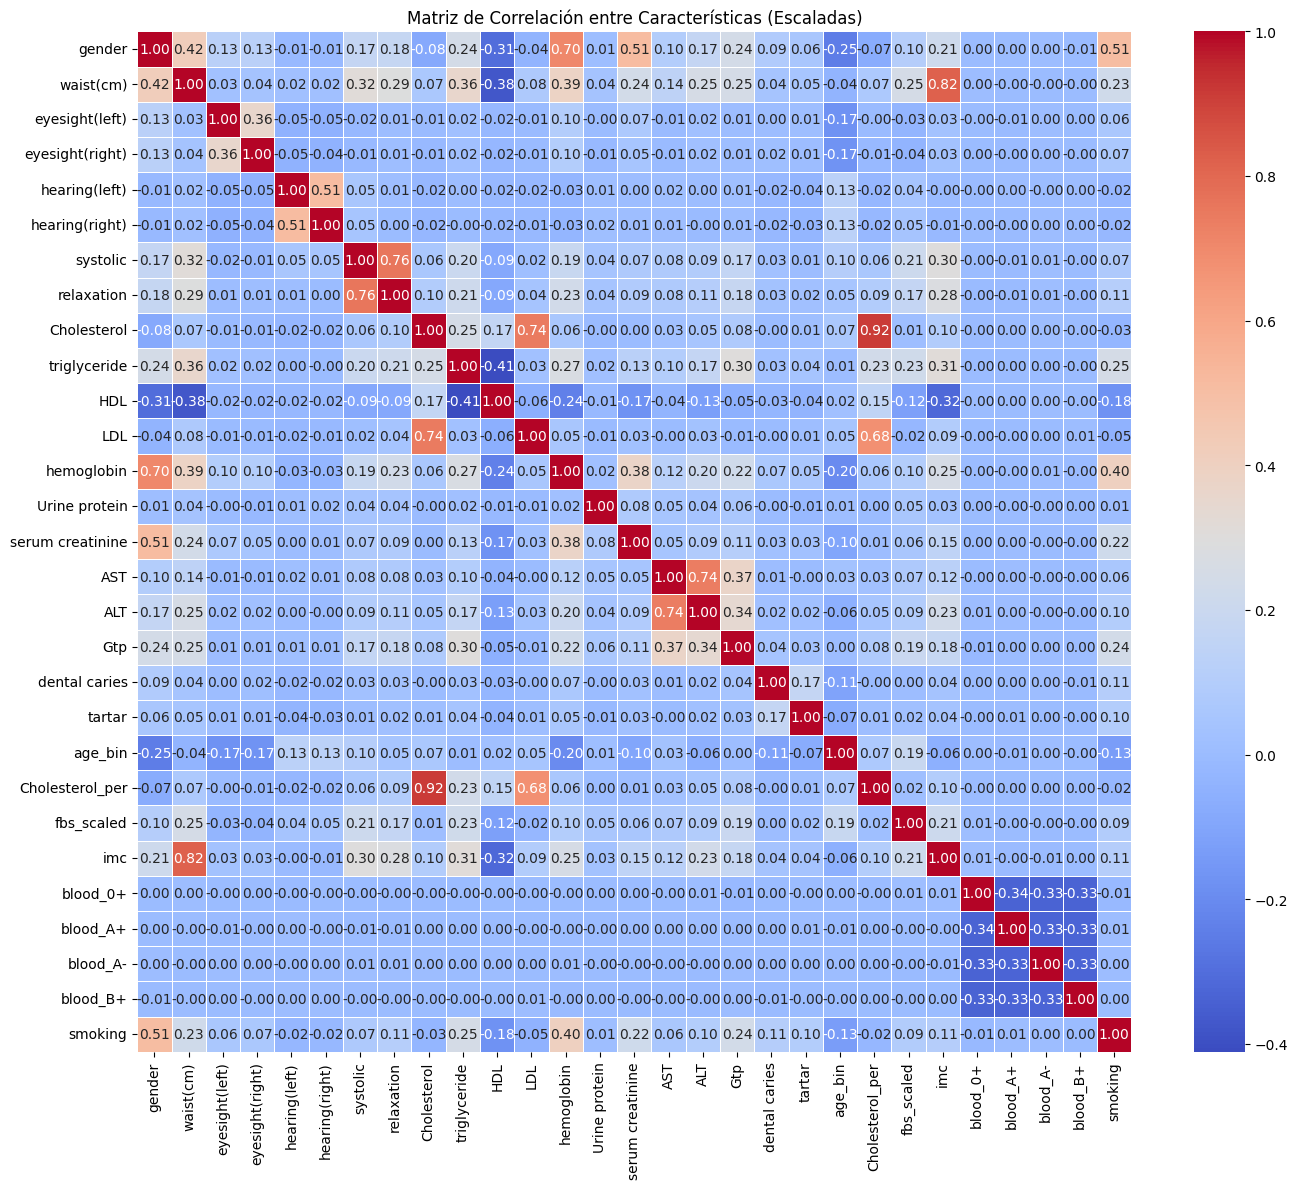

In [28]:
#matriz de correlacion
corr_matrix = df_scaled.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Características (Escaladas)")
plt.tight_layout()
plt.show()

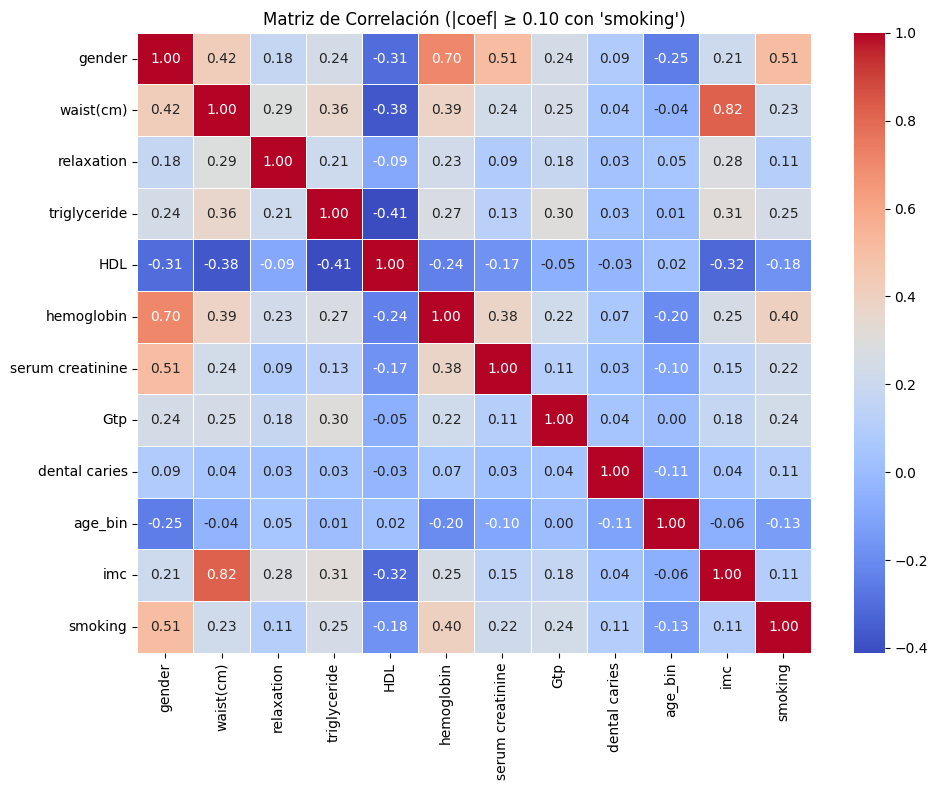

In [29]:
#hacemos un filtro para quitarnos las caracteristicas que parecen irrelevantes a priori para poder observar mejor la matriz de correlacion
cor_matrix = df_clean.corr()

# Extraer correlaciones con 'smoking' y filtrar por umbral de +-0.10
cor_smoking = cor_matrix['smoking'].drop('smoking')
cor_filtradas = cor_smoking[(cor_smoking >= 0.10) | (cor_smoking <= -0.10)]

# Seleccionar solo esas variables más 'smoking'
vars_filtradas = cor_filtradas.index.tolist() + ['smoking']

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[vars_filtradas].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación (|coef| ≥ 0.10 con 'smoking')")
plt.tight_layout()
plt.show()


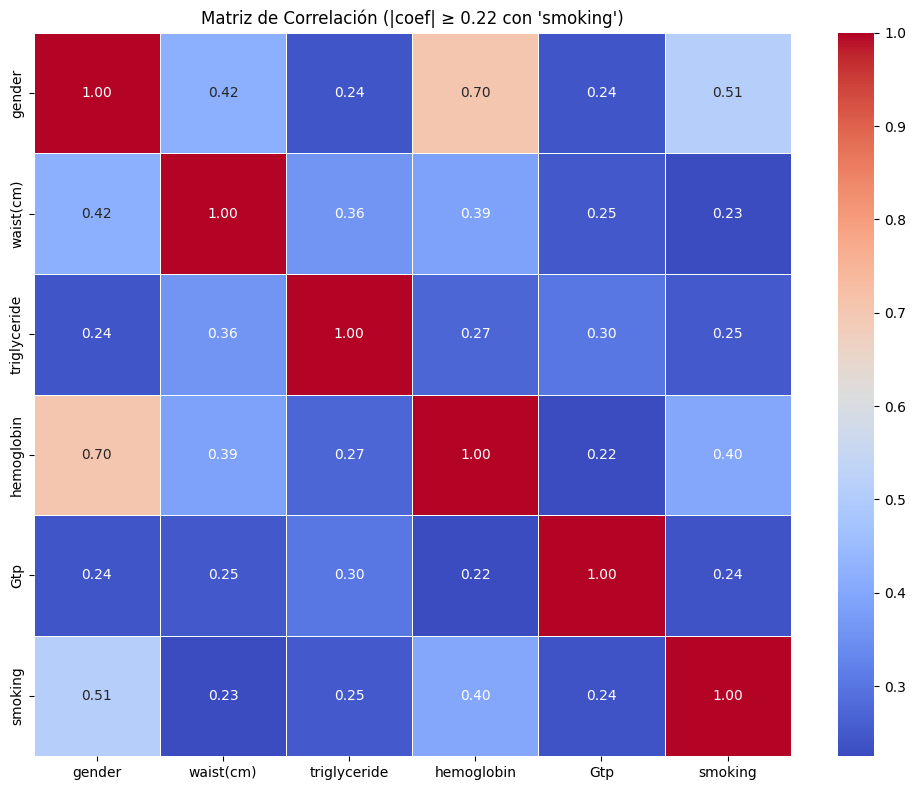

In [30]:
#hacemos un filtro para decidir las tres caracteristicas que mnas correlacion tienen con smoking
cor_matrix = df_clean.corr()

# Extraer correlaciones con 'smoking' y filtrar por umbral
cor_smoking = cor_matrix['smoking'].drop('smoking')
cor_filtradas = cor_smoking[(cor_smoking >= 0.22) | (cor_smoking <= -0.22)]

# Seleccionar solo esas variables más 'smoking'
vars_filtradas = cor_filtradas.index.tolist() + ['smoking']

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[vars_filtradas].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación (|coef| ≥ 0.22 con 'smoking')")
plt.tight_layout()
plt.show()


Conclusión del ejercicio:
Después de haber tratado las columnas y analizado las relaciones entre las distintas variables, observamos que la característica con mayor correlación con la variable objetivo es el género, lo cual indica que los hombres son significativamente más propensos a fumar que las mujeres. Este hallazgo resulta coherente con los resultados obtenidos en un ejercicio anterior.

La segunda variable con mayor correlación es la hemoglobina, con un coeficiente de correlación cercano a 0.4, lo que sugiere también una influencia relevante.

A continuación, se identifica un grupo de variables con una importancia similar: waist (circunferencia de cintura), triglyceride, serum creatinine y GTP, todas ellas con una correlación positiva con el hábito de fumar. Esto refleja que fumar tiene un impacto directo en varios indicadores bioquímicos y físicos.

Si tuviera que destacar solo tres características, me quedaría con waist como la tercera más relevante. Aunque no sea la que más valor de correlación tiene y al no tener un conocimiento especializado en enzimas, triglicéridos o niveles de creatinina, considero lógico que una persona fumadora tienda a tener peores hábitos de vida, lo que se manifiesta en un aumento de la circunferencia de la cintura. Esta variable está estrechamente relacionada con el IMC, lo que refuerza la idea de que fumar puede estar asociado con una mayor predisposición a la obesidad.



# Construcción del Modelo

**Ejercicio 8**: Elegir y aplicar el modelo de clasificación adecuado a partir de las opciones vistas en clase:

* **Entrenamiento**: Capacitar el modelo seleccionado con el conjunto de entrenamiento mediante el algoritmo kNN o el SVM. Justifica tu respuesta.


Mejor valor de k: 1
Accuracy medio: 0.7169


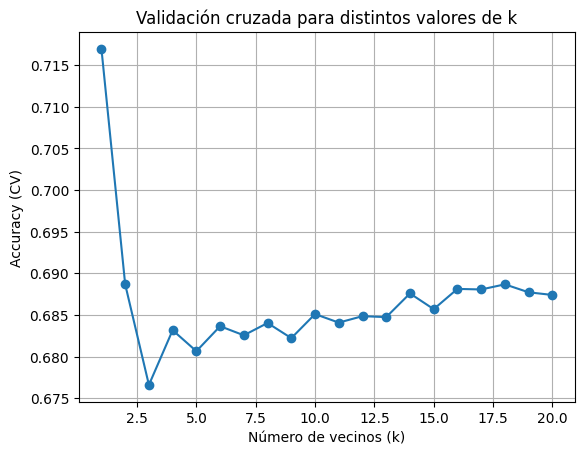

In [31]:
X = df_clean.drop(columns=['smoking'])
y = df_clean['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# Buscar mejor k
vecinos = list(range(1, 21))
scores = []

for k in vecinos:
    modelo = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy').mean()
    scores.append(cv_score)

mejor_k = vecinos[scores.index(max(scores))]
print("Mejor valor de k:", mejor_k)
print("Accuracy medio:", round(max(scores), 4))

plt.plot(vecinos, scores, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Accuracy (CV)')
plt.title('Validación cruzada para distintos valores de k')
plt.grid(True)
plt.show()

In [32]:
# Separar variables predictoras y variable objetivo
X = df_clean.drop(columns=['smoking'])
y = df_clean['smoking']

# División del conjunto (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# Crear y entrenar modelo kNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Evaluación del Modelo

**Ejercicio 9**: Evaluar el rendimiento del modelo es clave para entender su efectividad. Se incluye:

* **Comparación de métricas**: Observar y analizar métricas de rendimiento vistas en clase tales como el accuracy, la precisión, recall, F1-score, AUC-ROC y matriz de confusión. ¿Qué conclusiones se pueden extraer de cada una de estás métricas?

* **Validación cruzada**: Utilizar la validación cruzada para optimizar hiperparámetros y confirmar la estabilidad del modelo. ¿Cuál es la mejor configuración de parámetros?

In [33]:
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Cálculo de métricas
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
auc = roc_auc_score(y_test, y_prob_knn)
cm = confusion_matrix(y_test, y_pred_knn)

# Mostrar resultados
print("=== MÉTRICAS DEL MODELO kNN ===")
print("Accuracy:", round(acc, 4))
print("Precisión:", round(prec, 4))
print("Recall:", round(rec, 4))
print("F1-score:", round(f1, 4))
print("AUC-ROC:", round(auc, 4))
print("Matriz de Confusión:\n", cm)



=== MÉTRICAS DEL MODELO kNN ===
Accuracy: 0.745
Precisión: 0.6458
Recall: 0.647
F1-score: 0.6464
AUC-ROC: 0.7236
Matriz de Confusión:
 [[5628 1405]
 [1398 2562]]


In [34]:

# Crear modelo
svm_linear = SVC(kernel='linear', C=100, probability=True, max_iter=50000)

# Entrenar desde cero
svm_linear.fit(X_train, y_train)

# Predicciones
y_pred_svmLinear = svm_linear.predict(X_test)
y_prob_svmLinear = svm_linear.predict_proba(X_test)[:, 1]

# Calcular métricas
acc_svmLinear = accuracy_score(y_test, y_pred_svmLinear)
prec_svmLinear = precision_score(y_test, y_pred_svmLinear)
rec_svmLinear = recall_score(y_test, y_pred_svmLinear)
f1_svmLinear = f1_score(y_test, y_pred_svmLinear)
auc_svmLinear = roc_auc_score(y_test, y_prob_svmLinear)
cm_svmLinear = confusion_matrix(y_test, y_pred_svmLinear)

# Imprimir métricas
print("=== MÉTRICAS DEL MODELO SVM LINEAL (C=100) ===")
print("Accuracy:", round(acc_svmLinear, 4))
print("Precisión:", round(prec_svmLinear, 4))
print("Recall:", round(rec_svmLinear, 4))
print("F1-score:", round(f1_svmLinear, 4))
print("AUC-ROC:", round(auc_svmLinear, 4))
print("Matriz de Confusión:\n", cm_svmLinear)




/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


=== MÉTRICAS DEL MODELO SVM LINEAL (C=100) ===
Accuracy: 0.6674
Precisión: 0.5543
Recall: 0.3919
F1-score: 0.4592
AUC-ROC: 0.6838
Matriz de Confusión:
 [[5785 1248]
 [2408 1552]]


In [35]:
# Crear modelo SVM con kernel RBF
svm_rbf = SVC(kernel='rbf', C=100, probability=True, max_iter=50000)

# Entrenar
svm_rbf.fit(X_train, y_train)

# Predicciones
y_pred_svmRBF = svm_rbf.predict(X_test)
y_prob_svmRBF = svm_rbf.predict_proba(X_test)[:, 1]

# Cálculo de métricas
acc_svmRBF = accuracy_score(y_test, y_pred_svmRBF)
prec_svmRBF = precision_score(y_test, y_pred_svmRBF)
rec_svmRBF = recall_score(y_test, y_pred_svmRBF)
f1_svmRBF = f1_score(y_test, y_pred_svmRBF)
auc_svmRBF = roc_auc_score(y_test, y_prob_svmRBF)
cm_svmRBF = confusion_matrix(y_test, y_pred_svmRBF)

# Imprimir resultados
print("=== MÉTRICAS DEL MODELO SVM RBF (C=100) ===")
print("Accuracy:", round(acc_svmRBF, 4))
print("Precisión:", round(prec_svmRBF, 4))
print("Recall:", round(rec_svmRBF, 4))
print("F1-score:", round(f1_svmRBF, 4))
print("AUC-ROC:", round(auc_svmRBF, 4))
print("Matriz de Confusión:\n", cm_svmRBF)




/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


=== MÉTRICAS DEL MODELO SVM RBF (C=100) ===
Accuracy: 0.7577
Precisión: 0.6513
Recall: 0.7043
F1-score: 0.6768
AUC-ROC: 0.8358
Matriz de Confusión:
 [[5540 1493]
 [1171 2789]]


# Evaluación del Modelo

**Ejercicio 9**: Evaluar el rendimiento del modelo es clave para entender su efectividad. Se incluye:

## **Comparación de métricas**

| Métrica   | kNN       | SVM Lineal | SVM RBF |
| --------- | --------- | ---------- | ------- |
| Accuracy  |   0.745   | 0.6674     | 0.7577  |
| Precisión | 0.6458    | 0.5543     | 0.6513  |
| Recall    | 0.6470    | 0.3919     | 0.7043  |
| F1-score  | 0.6464    | 0.4592     | 0.6768  |
| AUC-ROC   | 0.7236    | 0.6838     | 0.8358  |

Empezamos comparando la métrica de accuracy, que indica el porcentaje de aciertos del modelo sobre el total de casos. Observamos que el modelo SVM con kernel RBF es el que mayor precisión general consigue, con un 75.77%, seguido muy de cerca por kNN con un 74.5%, y finalmente el SVM lineal con un rendimiento claramente inferior (66.74%). Este dato ya anticipa que el SVM lineal podría no ser adecuado para este problema, posiblemente porque las clases no son linealmente separables.

La precisión nos indica la proporción de predicciones positivas correctas respecto al total de predicciones positivas realizadas. En este caso, los tres modelos presentan valores similares, pero nuevamente el SVM RBF se sitúa como el mejor (0.6513), seguido por kNN (0.6458) y bastante más atrás el SVM lineal (0.5543). Esto nos muestra que el modelo con kernel RBF comete menos errores cuando predice que un individuo es fumador.

Más revelador aún es el recall, que nos indica la capacidad del modelo para identificar correctamente a los verdaderos positivos, es decir, a los fumadores reales. Aquí el modelo RBF destaca con un 70.43%, siendo el único que supera la barrera del 70%. El modelo kNN también ofrece un valor aceptable (64.7%), pero el SVM lineal queda muy por debajo (39.19%), lo que implica que deja pasar demasiados casos positivos sin detectarlos. Esto penaliza especialmente su utilidad en contextos donde es más importante identificar correctamente a los fumadores que minimizar los falsos positivos.

El F1-score, que es una media que se encuentra entre precisión y recall, confirma la tendencia: SVM RBF obtiene el valor más alto (0.6768), mostrando el mejor equilibrio entre precisión y sensibilidad. kNN también muestra un F1-score sólido (0.6464), mientras que SVM lineal sigue rezagado (0.4592).

Finalmente, el AUC-ROC (área bajo la curva ROC) representa la capacidad del modelo para discriminar entre las clases en distintos umbrales. Este es, quizás, el dato más contundente: el SVM RBF alcanza un valor de 0.8358, muy superior al de kNN (0.7236) y al de SVM lineal (0.6838). Esto indica que el modelo RBF no solo acierta más, sino que también es mucho más estable y discriminativo a la hora de separar correctamente a fumadores y no fumadores.

A partir de este análisis, queda claro que el modelo más sólido y fiable para nuestro problema es el SVM con kernel RBF. No solo ha superado en todas las métricas a los otros dos modelos, sino que además ha demostrado ser más consistente y eficaz a la hora de identificar correctamente a los individuos fumadores, que es precisamente la clase objetivo de nuestro estudio. Su capacidad para modelar relaciones no lineales resulta especialmente valiosa dado el tipo de datos que manejamos, lo que lo convierte en la opción óptima frente a las alternativas evaluadas.

## **Validación cruzada**

 Utilizar la validación cruzada para optimizar hiperparámetros y confirmar la estabilidad del modelo. ¿Cuál es la mejor configuración de parámetros?

En caso de knn, se ha probado con diferentes valores de `k` y se ha seleccionado k=1 como el valor que mejor rendimiento ofrece.

 Aunque k=1 (Número de vecinos: 1) puede ser más sensible al ruido (porque depende de un único vecino), en este conjunto ha dado los mejores resultados en validación cruzada.
* Esta configuración minimiza el error de clasificación en test, demostrando que el modelo se adapta bien a la estructura del conjunto de datos actual.

Por otro lado se ha intentado realizar esta validación cruzada para SVM pero ha sido imposible, la carga computacional asumida era demasiado grande y tras haber dejado durante varias noches la celda ejecutando no ha sabido ofrecer una respuesta. Por lo tanto, decidí no hacer validación cruzada y utilizarlo solo para un valor de C. Esto seguía teniendo porblemas debido a que seguía siendo una carga computacional demasiado alta y tenía el mismo problema. En este caso, busqué la manera de limitarlo. Encontré un parámetro que limita las máximas iteraciones. Jugando con este parámetro observo que a medida que aumentan estas iteraciones mejora la calidad del modelo pero también aumenta la carga computacional. Teniendo esto en cuenta y a partir de ensayo y error, he conseguido darle un valor que consigue el equilibrio entre un modelo bien entrenado con resultados razonables y con un tiempo de carga no muy elevado.

# Interpretación de Resultados y Conclusiones

**Ejercicio 10**: Analizar la influencia de cada característica y propuestas de mejora del modelo.

* Según lo examinado en el modelo, ¿Cuál crees que es la característica más
importante? Justifica tu respuesta.
* ¿Cómo crees que podrías mejorar el modelo en futuras iteraciones?



#¿Cuál crees que es la característica más importante?

En base al análisis realizado durante la práctica, la característica que muestra mayor influencia en el hábito de fumar es gender. Esto se refleja en que ha sido la variable con mayor valor de correlación con la variable objetivo smoking, y ese resultado se alinea con observaciones anteriores del estudio, donde ya se había detectado que el porcentaje de hombres fumadores era considerablemente más alto que el de mujeres.

Aunque otras variables como hemoglobin, waist(cm), serum creatinine o gtp también muestran una correlación positiva significativa con el tabaquismo, su fuerza predictiva es ligeramente inferior y su interpretación puede estar más sujeta a factores clínicos o bioquímicos menos visibles a simple vista y que al final tengo menos conocimento de ellos. En cambio, gender no solo tiene una correlación clara, sino también una lógica social evidente, lo que refuerza su relevancia en la predicción del hábito de fumar.

Por tanto, combinando el análisis cuantitativo (correlaciones y métricas) con la lógica de los patrones de comportamiento sociales, se concluye que la variable gender es la más importante en este contexto.
# ¿Cómo podrías mejorar el modelo en futuras iteraciones?

**Modelo más complejo:**

Si el tiempo de cómputo no es un problema, se puede comparar con otros modelos como Random Forest, SVM (con todas las iteraciones necesarias) o incluso redes neuronales.


**Balanceo de clases:**

En caso de que haya desbalanceo como parece que pasa en algunas características aplicar técnicas, estuidiar dichos datos, sacar los valores estadísticos necesarios según los mismos y posteriormente crear datos sintéticos.
